<a href="https://colab.research.google.com/github/Roumyajit/My-Project-Data-Science/blob/main/Copy_of_YouTube_Trending_Video_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   lik

<ipython-input-2-b55aaa141c2b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels.values, y=top_channels.index, palette='magma')


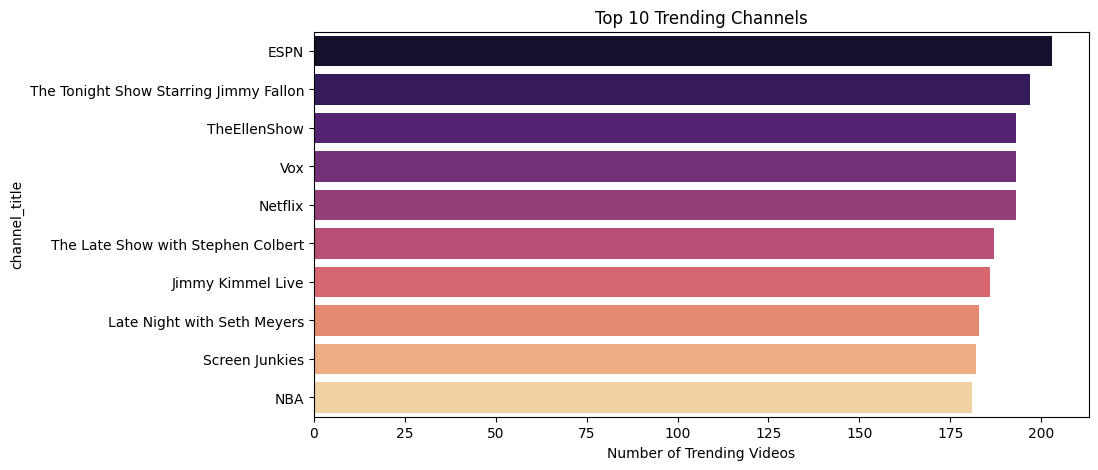

<ipython-input-2-b55aaa141c2b>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


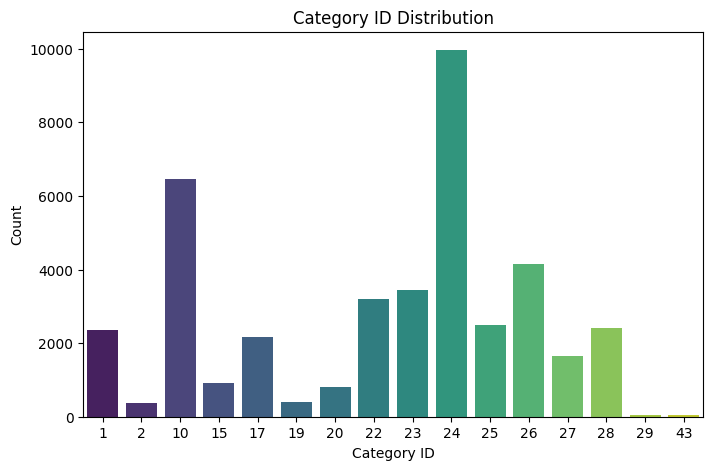

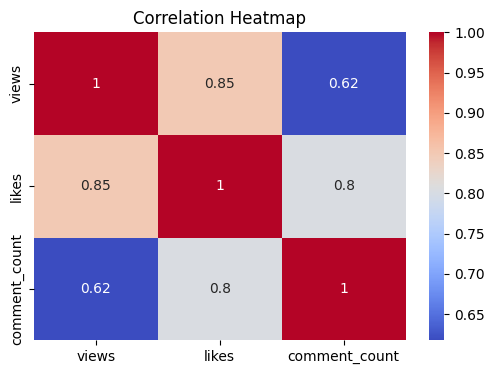

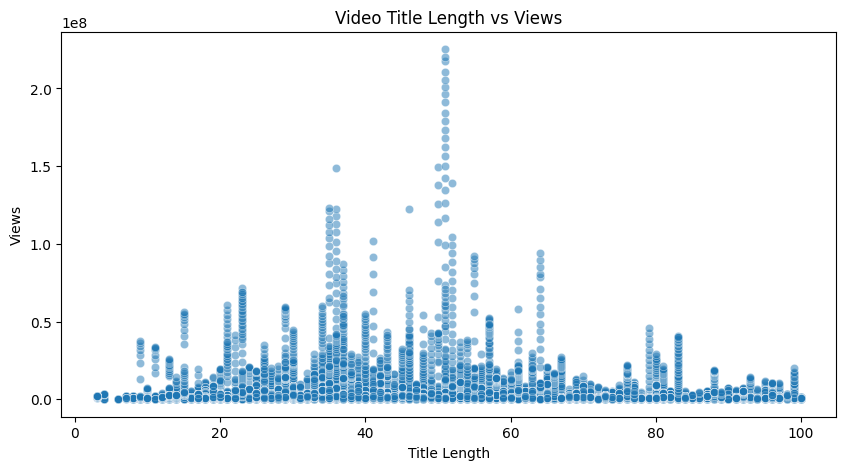

<ipython-input-2-b55aaa141c2b>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='pastel')


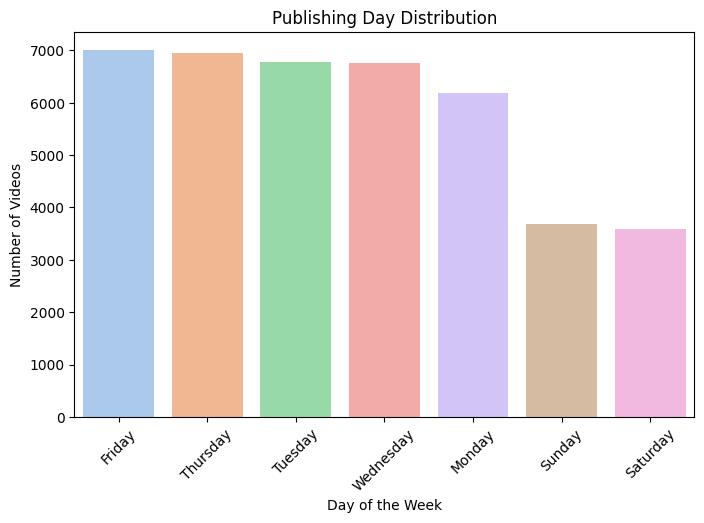

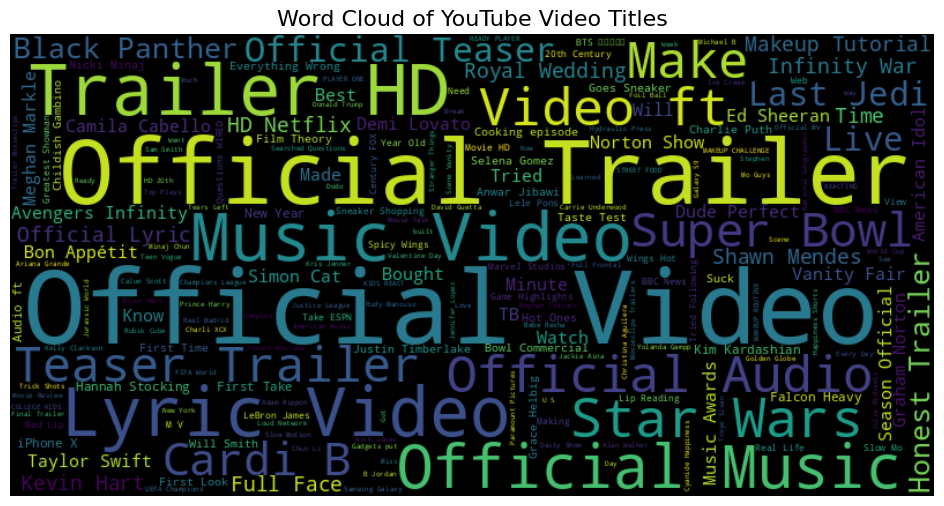

In [ ]:
# YouTube Trending Video Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Dataset Load
df = pd.read_csv('/content/USvideos.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Preview data
print(df.head())
print("Columns:", df.columns.tolist())

# Top 10 Trending Channels
top_channels = df['channel_title'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_channels.values, y=top_channels.index, palette='magma')
plt.title('Top 10 Trending Channels')
plt.xlabel('Number of Trending Videos')
plt.show()

# Most Common Video Categories
category_counts = df['category_id'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Category ID Distribution')
plt.xlabel('Category ID')
plt.ylabel('Count')
plt.show()

# Correlation Heatmap: Views vs Likes vs Comments
corr = df[['views', 'likes', 'comment_count']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Video Title Length vs Views (Scatterplot)
df['title_length'] = df['title'].str.len()
plt.figure(figsize=(10,5))
sns.scatterplot(x='title_length', y='views', data=df, alpha=0.5)
plt.title('Video Title Length vs Views')
plt.xlabel('Title Length')
plt.ylabel('Views')
plt.show()

# Publishing Day Distribution
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_day'] = df['publish_time'].dt.day_name()
day_counts = df['publish_day'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='pastel')
plt.title('Publishing Day Distribution')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()

# WordCloud of Video Titles
text = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of YouTube Video Titles', fontsize=16)
plt.show()